In [1]:
import BlackScholes as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import risk_free_rates as rf
import implied_q as iq
import time
import Quintic

from matplotlib import cm

In [14]:
# Read the dataset

S0 = 4017.8

IV_df = pd.read_csv("hist_spx.csv")
moneyness = np.array([80.0,90.0,95.0,97.5,100.0,102.5,105.0,110.0,120.0])
maturities = np.array(IV_df['Exp Date']).flatten()
IV = np.array(IV_df.drop(columns = 'Exp Date'))/100.

K = S0 * moneyness / 100

# rho,H,eps = (-0.5379719629172968, 0.16495816930070772, 0.12310961942266)      
# a_k = np.array([0.6100182191716166, 1.4096022647091906, 0.14329490857401048, 0.17671021105591023])

rho,H,eps = (-0.5395758687645315, 0.1167849647787641, 0.287648088584731)      
a_k = np.array([2.831824515605942, 3.7664119695252323, 3.4334303710852687, 1.166876967815469])

In [15]:
T = maturities[1]; r = rf.r(T); q = iq.q(T);
iv = IV[1,:]
N = 12500; n = 300;
w = np.concatenate((np.zeros([1,N*2]), Quintic.dW(n, N)))

P = Quintic.local_reduction(rho, H, eps, T, a_k, S0, K, n, N, w, r, q)
iv_model = bs.BSImpliedVol(S0, K, T, r, q, P, Option_type = 1, toll = 1e-10)

In [16]:
print(f"Relative mean error on IV: {np.mean(abs(iv-iv_model)/iv)*100:.4f}%")

Relative mean error on IV: 4.5698%


In [10]:
print(f"Relative mean error on IV: {np.mean(abs(iv-iv_model)/iv)*100:.4f}%")

Relative mean error on IV: 3.5725%


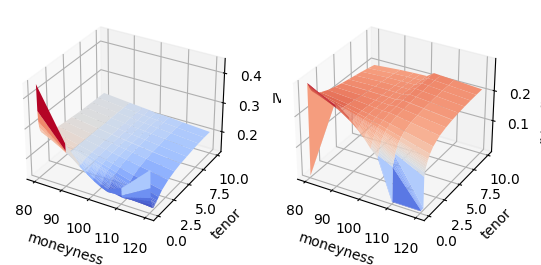

In [7]:
#%matplotlib notebook

mesh_x, mesh_y = np.meshgrid(moneyness,maturities)

fig = plt.figure()
ax1 = fig.add_subplot(121,projection='3d')
surf1 = ax1.plot_surface(mesh_x, mesh_y, IV, cmap=cm.coolwarm, antialiased=True)
ax1.set_xlabel('moneyness')
ax1.set_ylabel('tenor')
ax1.set_zlabel('IV')

ax2 = fig.add_subplot(122,projection='3d')
surf2 = ax2.plot_surface(mesh_x, mesh_y, iv, cmap=cm.coolwarm, antialiased=True)
ax2.set_xlabel('moneyness')
ax2.set_ylabel('tenor')
ax2.set_zlabel('IV Calibrated')

plt.show()